In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_parquet('/content/drive/MyDrive/digital_breakthrough/train_dataset_hackaton2023_train.gzip')

In [3]:
df_test = pd.read_parquet('/content/drive/MyDrive/digital_breakthrough/hackaton2023_test.gzip')

In [22]:
df_train.tail(30)

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,hour,part_of_day
24261930,46639170,10.0,1,train,1.00,2023-07-31 19:34:17,Пиво Туборг Грин 0.5л розлив,80.2,Фудкорт без туалета,19,Evening
24261931,46639170,10.0,1,train,168.99,2023-07-31 19:34:17,Пиво Туборг Грин 0.5л розлив,80.2,Фудкорт без туалета,19,Evening
24261932,46639170,10.0,1,train,49.99,2023-07-31 19:34:17,Острый Томатный соус,80.2,Фудкорт без туалета,19,Evening
24261933,46639170,10.0,1,train,179.99,2023-07-31 19:34:17,Наггетсы (12 шт.),80.2,Фудкорт без туалета,19,Evening
24261934,46639170,10.0,1,train,179.99,2023-07-31 21:48:49,Наггетсы (12 шт.),80.2,Фудкорт без туалета,21,Evening
24261935,46639170,10.0,1,train,119.99,2023-07-31 21:48:49,Воппер Джуниор,80.2,Фудкорт без туалета,21,Evening
24261936,46639170,10.0,1,train,1.00,2023-07-31 21:48:49,Пиво Туборг Грин 0.5л розлив,80.2,Фудкорт без туалета,21,Evening
24261937,46639170,10.0,1,train,49.99,2023-07-31 21:48:49,Соус 1000 островов,80.2,Фудкорт без туалета,21,Evening
24261938,46639170,10.0,1,train,168.99,2023-07-31 21:48:49,Пиво Туборг Грин 0.5л розлив,80.2,Фудкорт без туалета,21,Evening
24261958,46654016,15.0,1,train,199.99,2023-08-01 12:13:37,Луковые Кольца (12 шт.),270.0,Отдельно стоящий с внешней зоной,12,Daytime


In [5]:
df_train.shape

(12129384, 9)

In [6]:
df_test.head()

,customer_id,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
1773606,13220760,test,0.28,2022-12-22 13:09:11,"Липтон Лимон в бутылке 0,5л",174.4,Фудкорт с туалетом
4035564,30315975,test,139.99,2023-03-05 16:45:05,Пиво Балтика 7 0.5л розлив,235.0,Отдельно стоящий
2507770,21679985,test,36.00,2022-12-13 16:10:55,Кинг Фри мал,165.0,Фудкорт без туалета
3963775,29754274,test,230.00,2023-03-14 14:10:43,Цезарь ролл со стрипсами,150.0,Фудкорт без туалета
859943,7797823,test,204.96,2022-10-22 14:09:28,Up Гранд Чиз Фреш,114.5,Фудкорт без туалета


In [7]:
df_test.shape

(2498034, 7)

In [8]:
df_train.describe()

,customer_id,date_diff_post,buy_post,revenue,ownareaall_sqm
count,1.212938e+07,9.660867e+06,1.212938e+07,1.212938e+07,1.212938e+07
mean,1.980954e+07,2.048039e+01,7.964846e-01,1.067995e+02,2.155130e+02
std,1.138904e+07,1.527091e+01,4.026126e-01,1.074385e+02,1.225907e+02
min,2.989100e+04,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,1.010852e+07,8.000000e+00,1.000000e+00,4.499000e+01,1.049000e+02
50%,2.127459e+07,1.700000e+01,1.000000e+00,7.998000e+01,2.104000e+02
75%,2.803856e+07,3.000000e+01,1.000000e+00,1.317725e+02,3.000000e+02
max,4.666180e+07,6.000000e+01,1.000000e+00,1.449971e+04,9.787000e+02


In [9]:
print(f"Duplicated rows: {df_train.duplicated(keep=False).sum()}")
print(f"Duplicated rows without target: {df_train.drop('buy_post', axis=1).duplicated(keep=False).sum()}")

Duplicated rows: 987940
Duplicated rows without target: 987940


In [10]:
pd.DataFrame(df_train.isna().sum(), columns=["NaN Count"])

,NaN Count
customer_id,0
date_diff_post,2468517
buy_post,0
group_name,0
revenue,0
startdatetime,0
dish_name,0
ownareaall_sqm,0
format_name,0


In [11]:
def part_of_day(x):
    if x < 5 or x > 23:
        return 'Night'
    if x < 10:
        return 'Morning'
    if x < 17:
        return 'Daytime'
    return 'Evening'

In [12]:
df_train['hour'] = df_train['startdatetime'].dt.strftime('%H')

df_train['hour'] = df_train['hour'].astype(int)

df_train['part_of_day'] = df_train['hour'].apply(part_of_day)

In [13]:
df_train['hour'].nunique()

24

In [23]:
df_train['hour'].value_counts()

18    1263007
17    1205922
19    1191861
16    1155785
15    1126268
14    1078896
13    1022713
20     964372
12     857663
21     641270
11     529905
10     340925
22     259327
9      147482
23     111674
8       83324
0       53772
7       31575
1       27289
6       13088
2       12049
5        4299
3        3773
4        3145
Name: hour, dtype: int64

In [14]:
pod_counts = df_train['part_of_day'].value_counts()
pod_counts

Daytime    6112155
Evening    5637433
Morning     279768
Night       100028
Name: part_of_day, dtype: int64

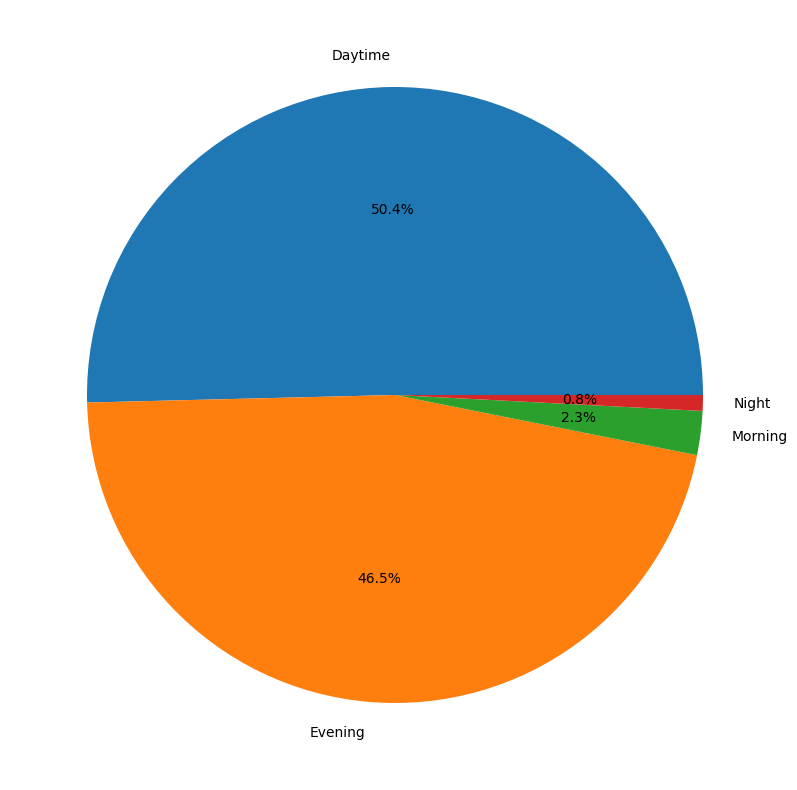

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.pie(pod_counts, labels=pod_counts.index, autopct='%1.1f%%');

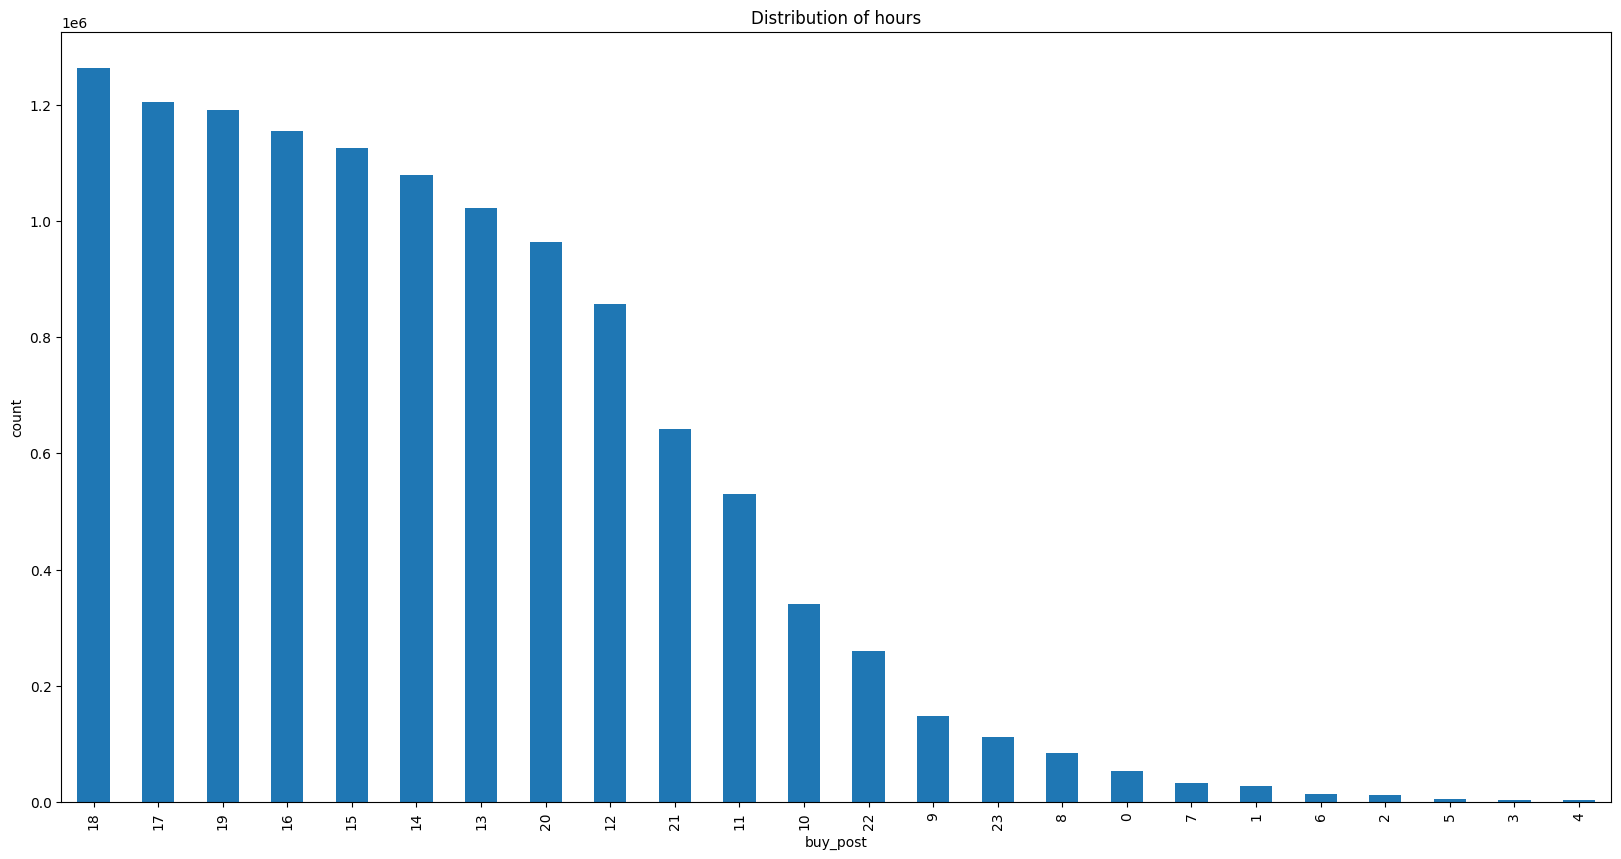

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))

df_train['hour'].value_counts().plot.bar(figsize=(20, 10))

plt.title('Distribution of hours')
plt.xlabel('buy_post')
plt.ylabel('count')
plt.show()


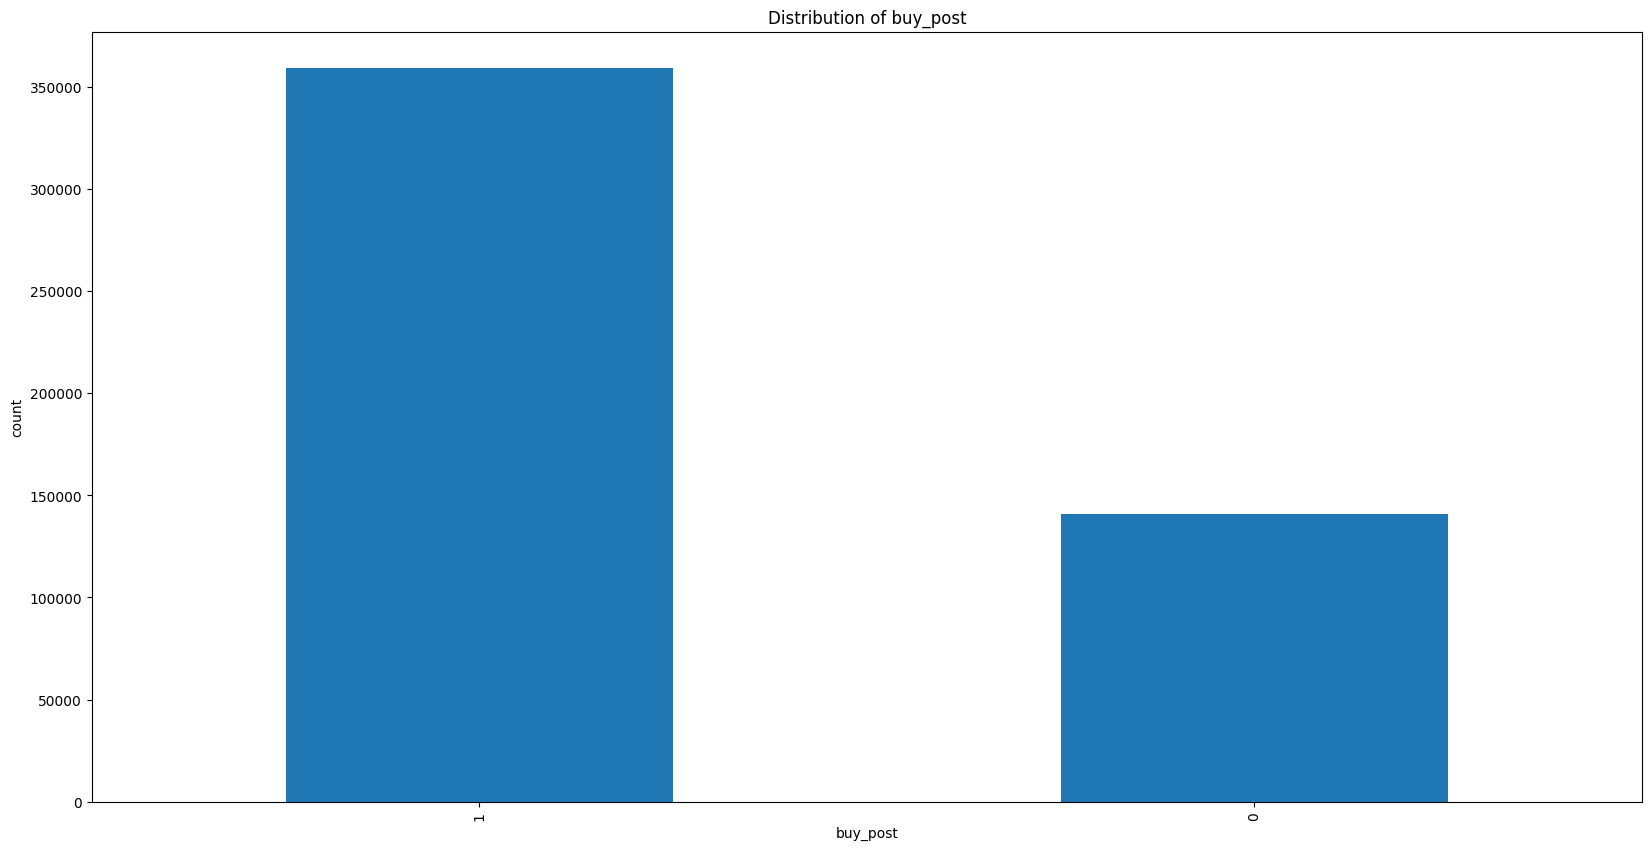

In [20]:
df_train.groupby('customer_id').agg('first')['buy_post'].value_counts().plot.bar(figsize=(20, 10))

plt.title('Distribution of buy_post')
plt.xlabel('buy_post')
plt.ylabel('count')
plt.show()


